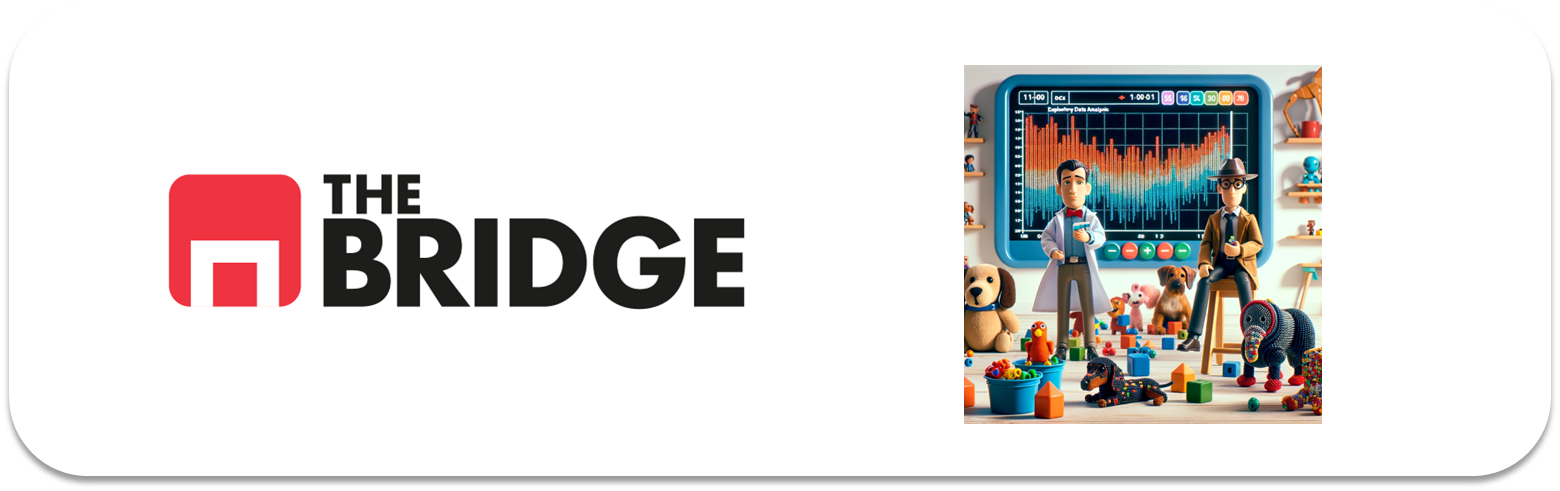

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms, plot_categorical_relationship_fin, grafico_dispersion_con_correlacion, bubble_plot # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [5]:
df_titanic.drop(columns = ["survived","deck","pclass","embarked"], inplace = True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns = ["parch","sibsp"], inplace = True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
df_titanic.loc[df_titanic["embark_town"].isna(), "embark_town"] = df_titanic["embark_town"].mode()[0]
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [8]:
# Pero si esto ya lo hice en la práctica 1...
df_titanic.loc[df_titanic["age"].isna(), "age"] = df_titanic["age"].mean()
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

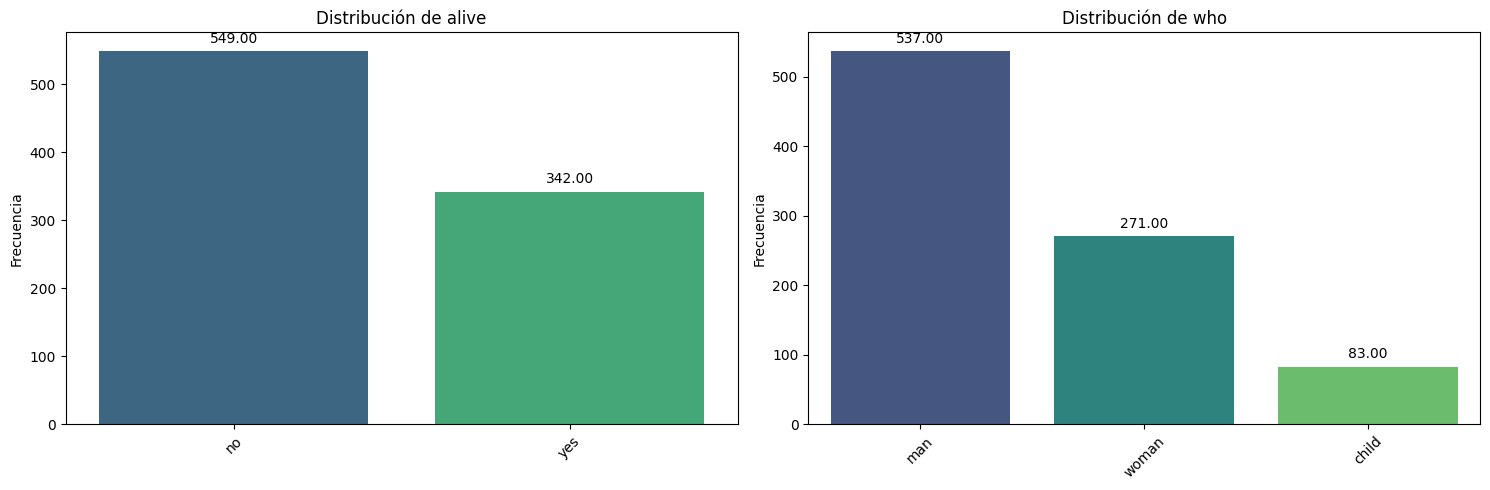

In [9]:
# comparamos las frecuencias cada una por separado
pinta_distribucion_categoricas(df_titanic,["alive", "who"], relativa = False, mostrar_valores = True)

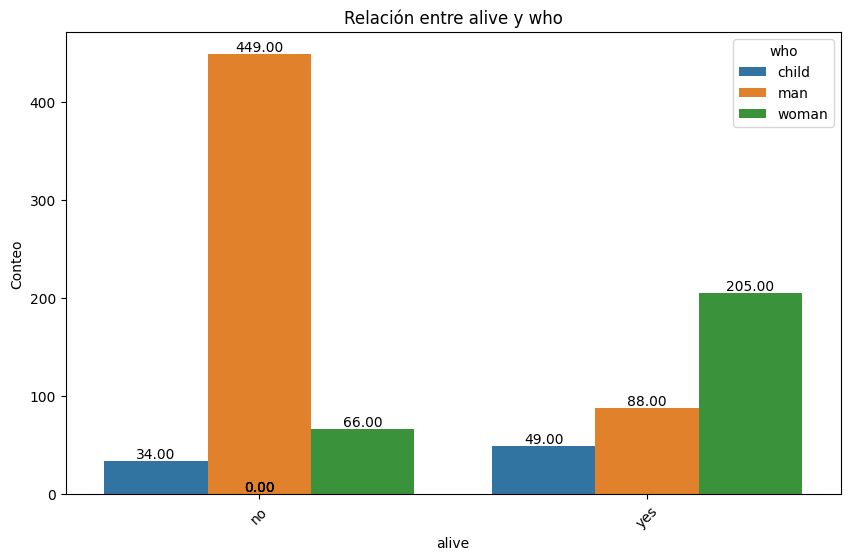

In [10]:
# Acá ya las cruzamos, con alive como directora
plot_categorical_relationship_fin(df_titanic,"alive", "who", show_values = True)
# primero en términos absolutos, donde vemos que murieron más hombres y sobrevivieron más mujeres

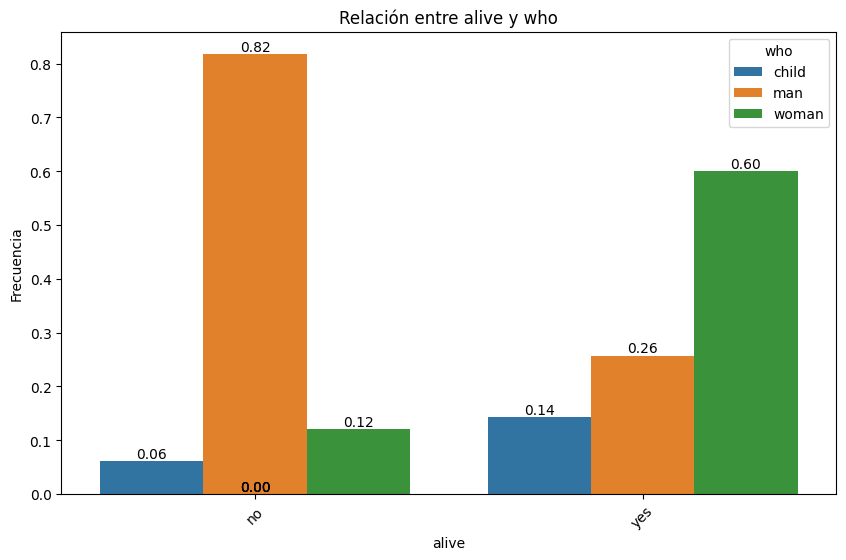

In [11]:
# Y ahora en relativos
plot_categorical_relationship_fin(df_titanic,"alive", "who", relative_freq = True, show_values = True)
# Está claro que sí hay relación de who con la supervivencia, tanto en términos absolutos como relativos
# En términos relativos también sobrevivieron más mujeres

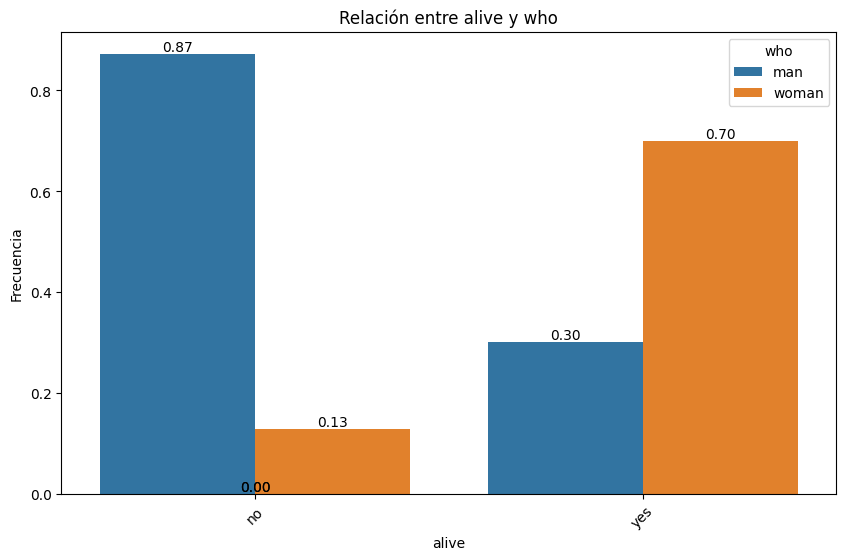

In [12]:
# Ahora comparación de alive hombres vs mujeres
sexo_filtrado = df_titanic.query("who != 'child'")
plot_categorical_relationship_fin(sexo_filtrado,"alive", "who", relative_freq = True, show_values = True)
# La variable sexo influye mucho, la mayoría de las mujeres sobrevivieron, los hombres murieron en mucha mayor proporción

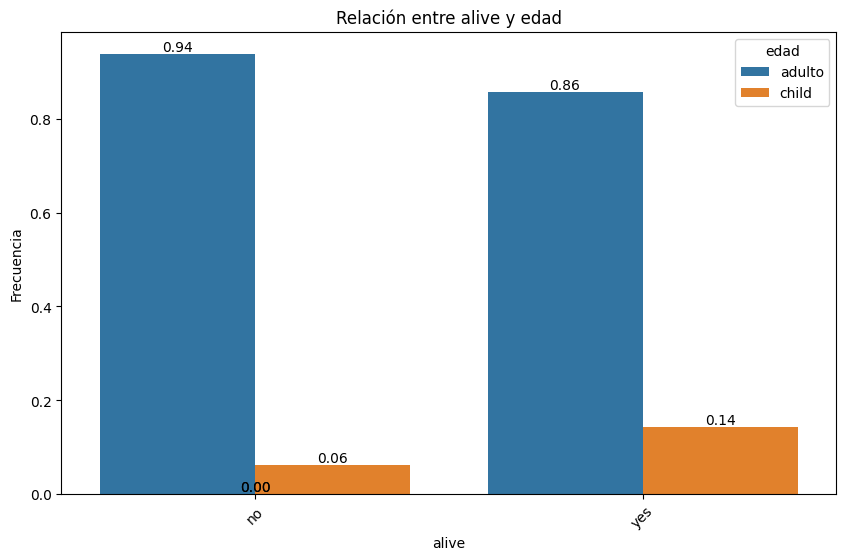

In [13]:
# Ahora adultos vs niños
df_titanic['edad'] = df_titanic['who'].replace({'man': 'adulto', 'woman': 'adulto'})
plot_categorical_relationship_fin(df_titanic,"alive", "edad", relative_freq = True, show_values = True)
# Vemos que los niños tuvieron mayores posibilides relativas de sobrevivir que los adultos de cualquier género

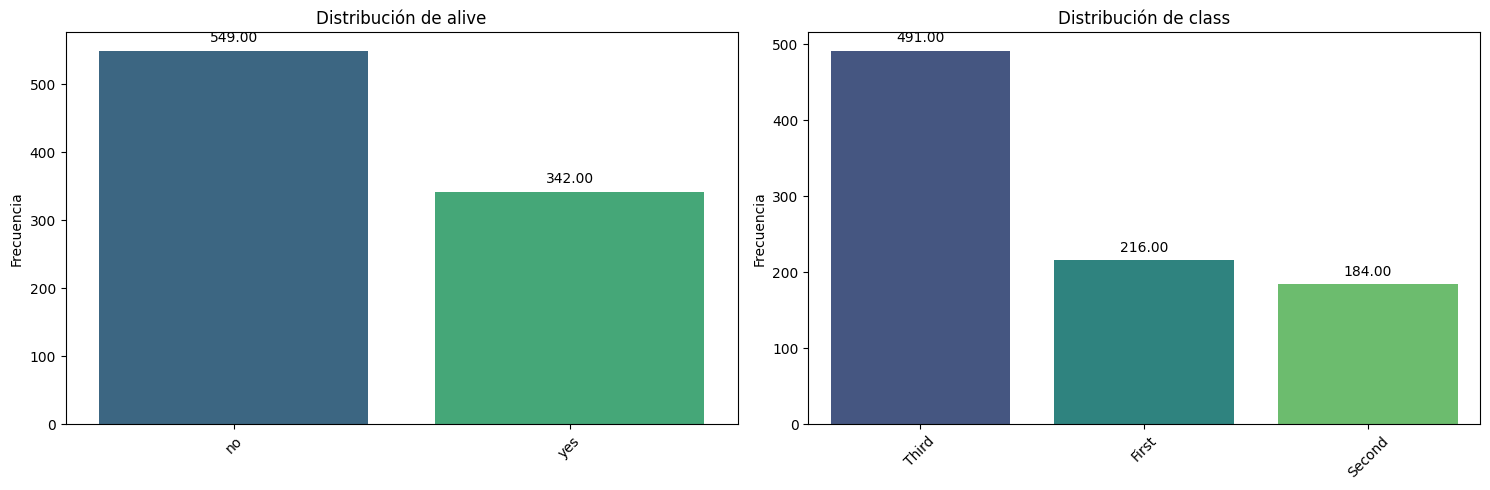

In [14]:
# Vamos a pos las clases
# comparamos las frecuencias cada una por separado
pinta_distribucion_categoricas(df_titanic,["alive", "class"], relativa = False, mostrar_valores = True)

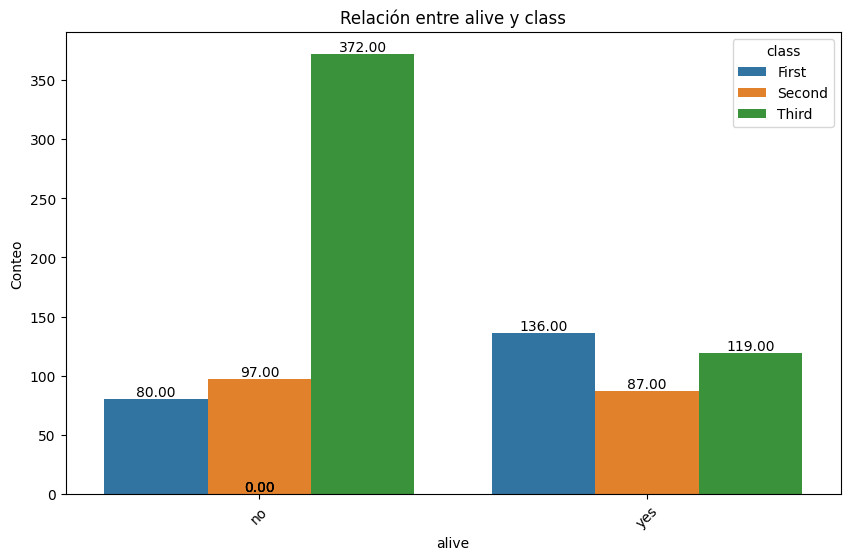

In [15]:
# Acá ya las cruzamos, con alive como directora
plot_categorical_relationship_fin(df_titanic,"alive", "class", show_values = True)
# primero en términos absolutos, donde vemos que murieron más personas de tercera clase y sobrevivieron más de primera
# De hecho, la mayoría de quienes viajaban en primera sobrevivió, en 2da casi al 50%, en tercera murieron casi todos

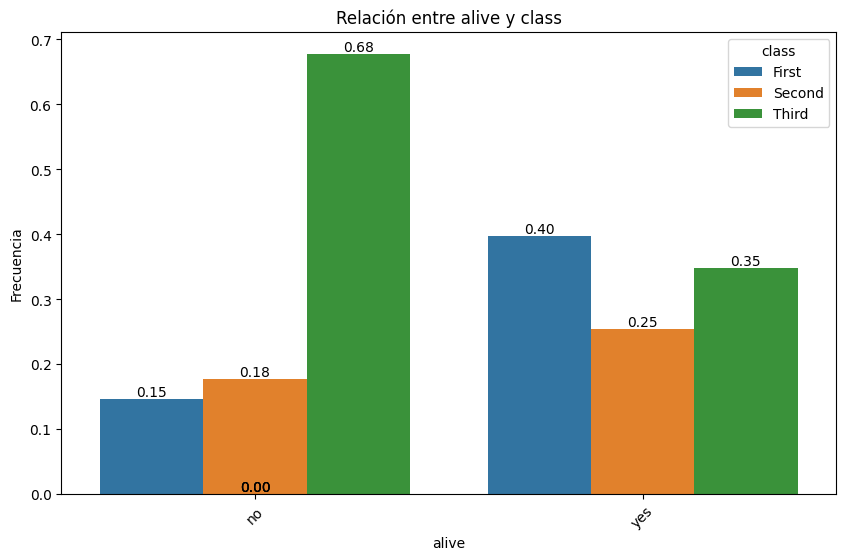

In [16]:
# Y ahora en relativos
plot_categorical_relationship_fin(df_titanic,"alive", "class", relative_freq = True, show_values = True)
# En terminos relativos se mantiene y acentúa lo del punto anterior. Si eras de primera las chances de sobrevivir 
# se disparan

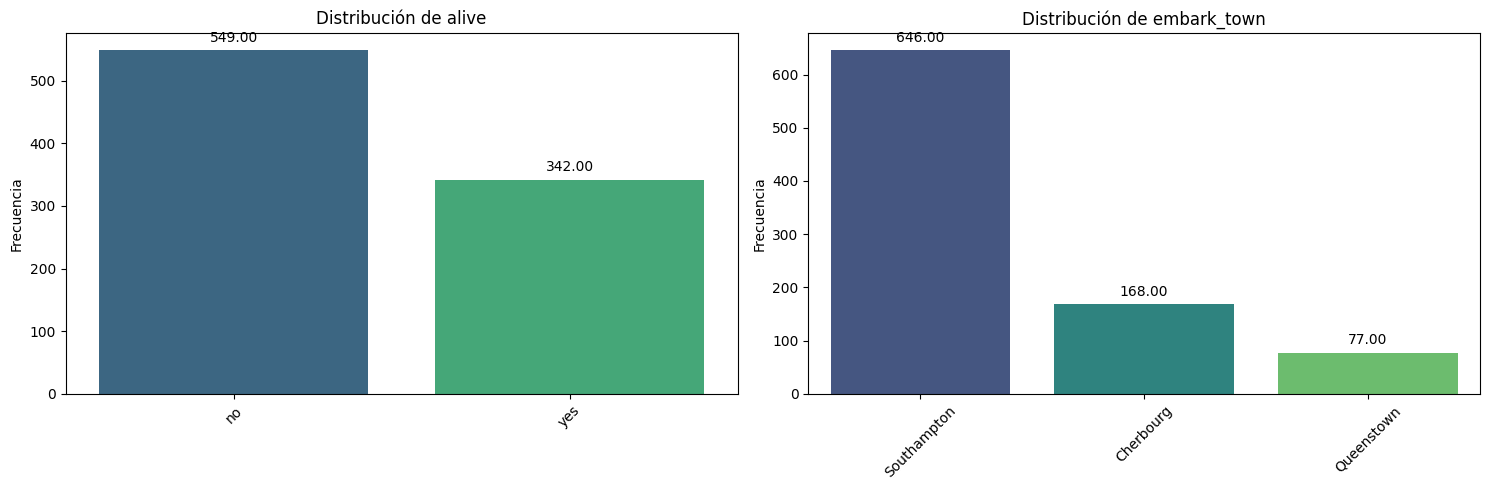

In [17]:
# Ahora por ciudades_
# comparamos las frecuencias cada una por separado
pinta_distribucion_categoricas(df_titanic,["alive", "embark_town"], relativa = False, mostrar_valores = True)

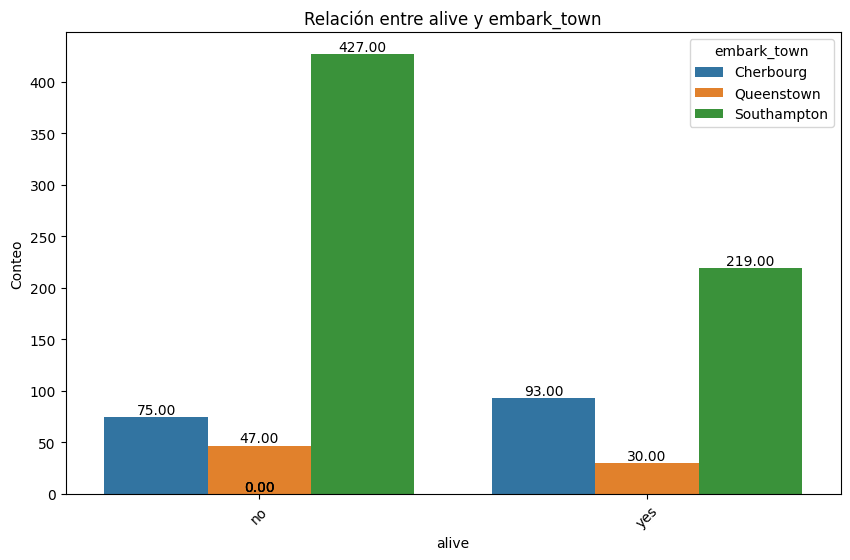

In [18]:
# Acá ya las cruzamos, con alive como directora
plot_categorical_relationship_fin(df_titanic,"alive", "embark_town", show_values = True)
# La gran mayoría de los muertos había subido en Southhampton, pero también de los vivos (era elmayor grupo)
# La mayoría de las personas embarcadas en Francia sí sobrevivió, y sus cifrasson aún mejores al ver los valores relativos

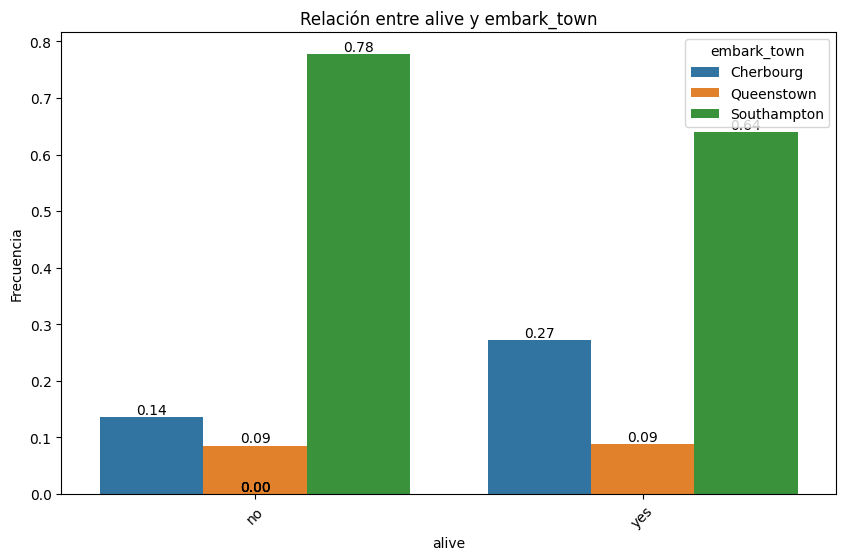

In [19]:
# Y ahora en relativos
plot_categorical_relationship_fin(df_titanic,"alive", "embark_town", relative_freq = True, show_values = True)

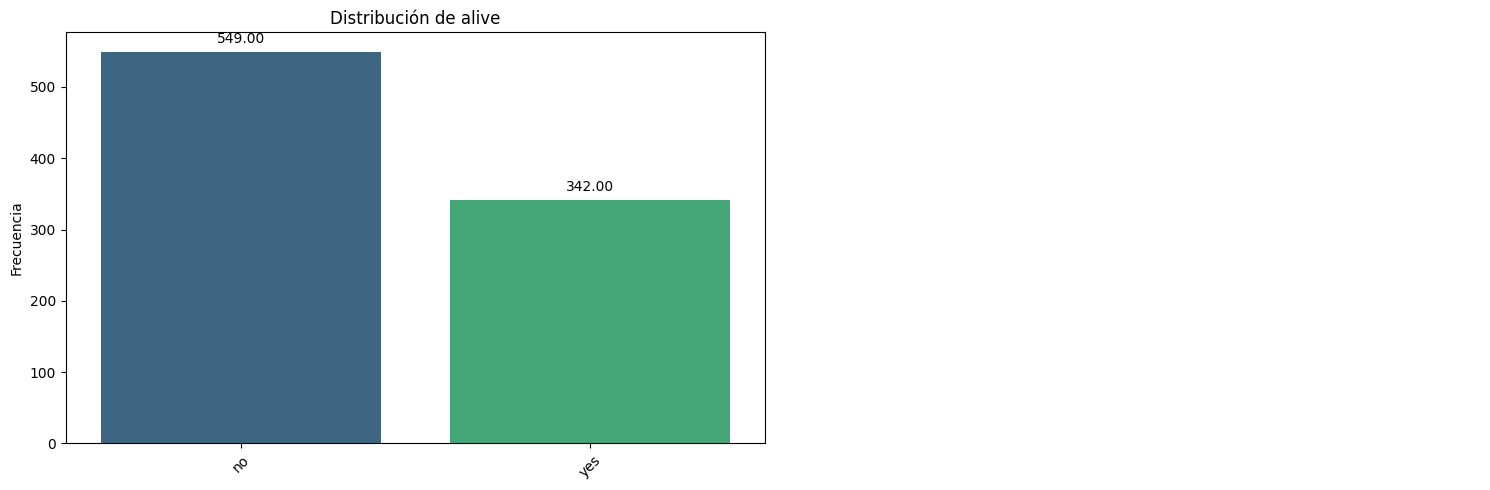

In [20]:
# Vamos a supervivencia y tarifas, que ya implica una categórica con una numérica, por eso aquí solo refresoo la categórica
pinta_distribucion_categoricas(df_titanic,["alive"], relativa = False, mostrar_valores = True)

(2,)


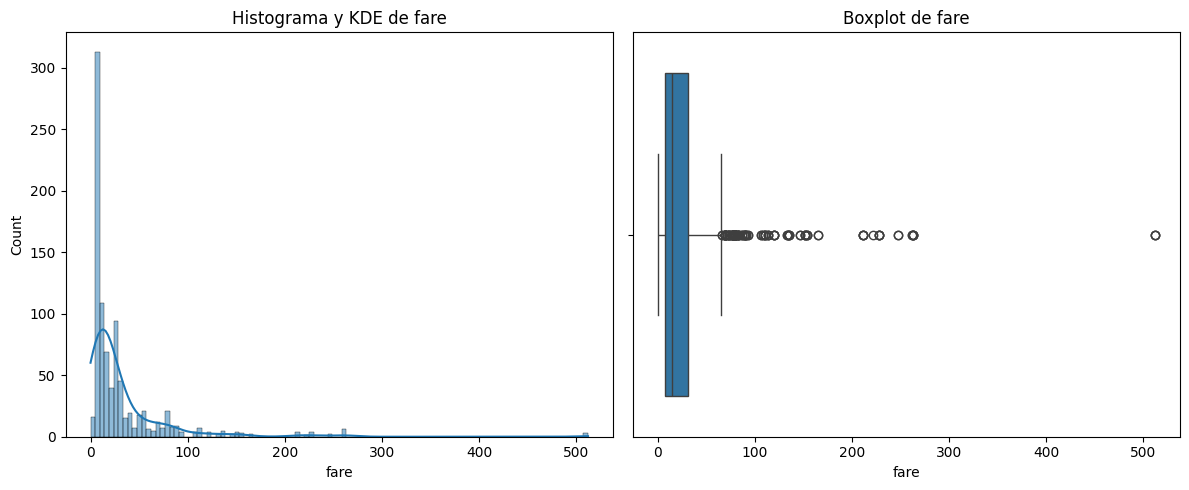

In [21]:
plot_combined_graphs(df_titanic,["fare"])

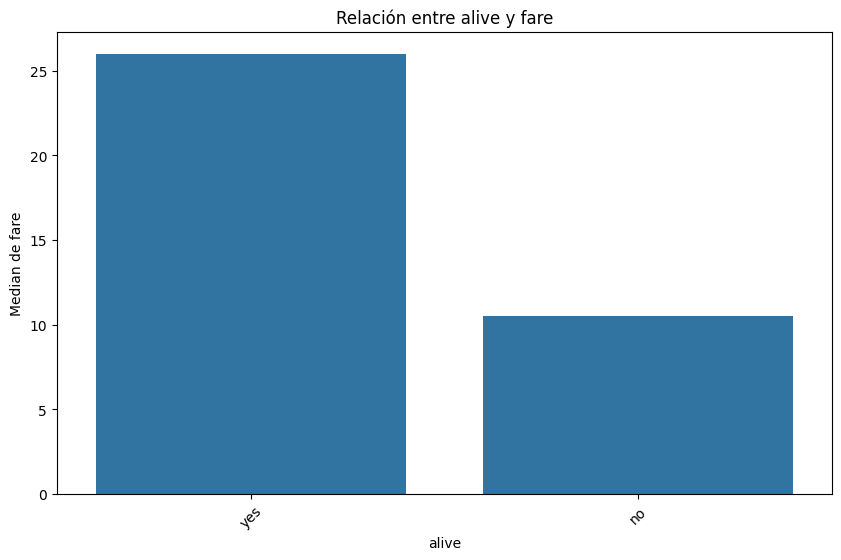

In [22]:
plot_categorical_numerical_relationship(df_titanic, "alive", "fare", measure = "median")
# Parece que muchos habían pagado un suplemento de supervivencia, ya que la tarifa media de los sobrevivientes es mucho más
# alta que la de los muertos

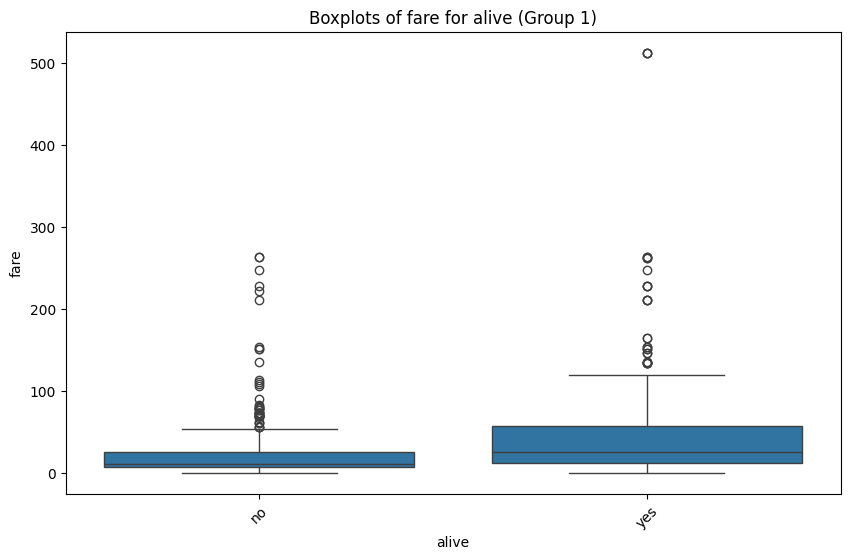

In [23]:
plot_grouped_boxplots(df_titanic, "alive","fare")

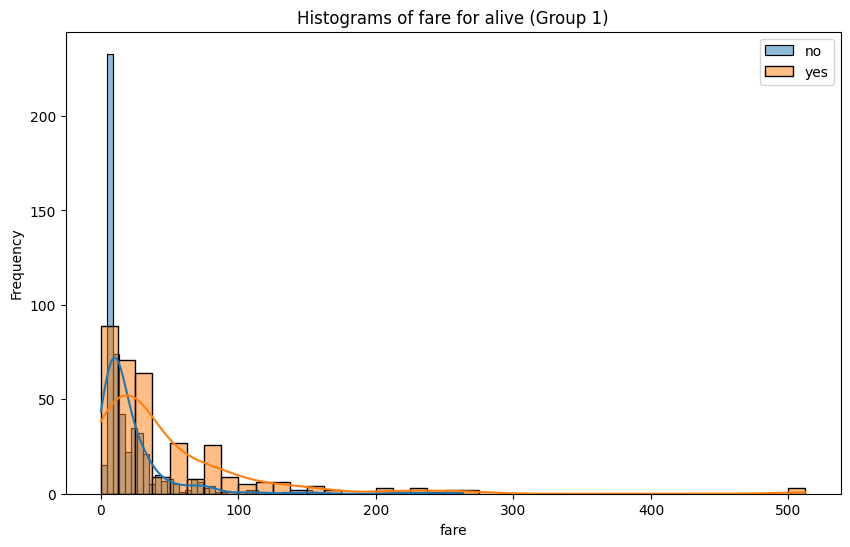

In [24]:
plot_grouped_histograms(df_titanic, "alive", "fare",2)
# Al contrastar los histogramas de nuevo vemos que los que sí sobrevivieron también pagaron tarifas más altas, la curva es 
# más equilibada, mientras que entre los que no sobrevivieron hay mayor concentración de tarifas básicas que no incluyen 
# alerta de emergencia, chaleco salvavidas ni embarque preferente en barcos salvavidas 

In [25]:
# Aunque ya se ve que sí hay relación entre tarifa y muerte, haré igualmente el u test

from scipy.stats import mannwhitneyu
vivos = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
muertos = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_valor= mannwhitneyu(vivos, muertos)
print("Estadístico:", u_stat)
print("Valor p:", p_valor)

# El p_value mucho menor a 0,5 confirma que sí que hay relación entre la tarifa pagada y el supervivencia

Estadístico: 129951.5
Valor p: 4.553477179250237e-22


In [26]:
# Ahora los que mas y menos pagaron

ricachones = df_titanic["fare"].max()
info_ricachones = df_titanic[df_titanic["fare"]== ricachones]
info_ricachones

# Parece que hubo 3 personas que pagaron la tarifa más alta, todos en primera clase, por supuesto.
# Hubo unamujer adulta sola, y dos hombres adultos, uno de los cuales iba acompañado de un familiar de tarifa inferior, 
# Los 3 eran franceses y sobrevivieron.

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,edad
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,adulto
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,adulto
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,adulto


In [27]:
polizon_o_tripulacion = df_titanic["fare"].min()
info_polotrip = df_titanic[df_titanic["fare"]== polizon_o_tripulacion]
info_polotrip.count()
# Hubo 15 pasajeros que no pagaron nada por ir a morir al medio del océano

sex               15
age               15
fare              15
class             15
who               15
adult_male        15
embark_town       15
alive             15
alone             15
family_members    15
edad              15
dtype: int64

In [28]:
info_polotrip.sort_values(by = "age", ascending = False)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,edad
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0,adulto
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,adulto
806,male,39.000000,0.0,First,man,True,Southampton,no,True,0,adulto
822,male,38.000000,0.0,First,man,True,Southampton,no,True,0,adulto
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0,adulto
277,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adulto
413,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adulto
466,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adulto
481,male,29.699118,0.0,Second,man,True,Southampton,no,True,0,adulto
633,male,29.699118,0.0,First,man,True,Southampton,no,True,0,adulto


In [29]:
# De todos estos que embarcaron gratis, murieron todos menos uno. Es posible que fueran todos miembros de la tripulación, 
# todos hombres que viajaban solos y subieron al Titanic desde el inicio del viaje. Estaban distribuidos por clase, tal vez 
# en función de su rango o el puesto que desempeñaran. Aunque elmayor de todos no, pero varios de los mayores estaban en 
# Primera clase, tal vez hayan sido el capitán o cargos similares. 
# Solo sobrevivió un hombre de unos 35 años que viajaba en tercera y ya había embaracado en Southhampton, tal vez fuera Di
# Caprio que tuvo acceso prioritario a los barcos salvavidas desde el camarote de Kate Winslet

# O, tal vez se haya puestp 0 en casos en que faltaba la info y habría que tomarlo como indicadorde falta de valor, no como 
# cifra en sí

In [30]:
# Análisis multivariane: alive, fare, embark_town
#bubble_plot(df_titanic, "alive","fare", "embark_town", scale = 10000)

# No me está saliendo esto.......

In [31]:
#col_directora = "alive"
#col_1 = "fare"
#col_2 = "embark_town"
#diccionario_multivariante = {}
#for valor in df_titanic[col_directora].unique():
#    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2, col_1]]

#for valor, df_titanic in diccionario_multivariante.items():
#    print(f"Respuesta {valor}:")
#    grafico_dispersion_con_correlacion(df_titanic, col_2, col_2, tamano_puntos = 20, mostrar_correlacion = True)

In [32]:
# Para lo último, primero voy a reorganizar las edades de numéricas a categóricas para simplificar lo que sigue, que entre 
# categóricas parece más sencillo. Parecería que con .cut puedo trocear los datos en bins según X valores y ponerles nombre:

df_titanic["franja_edad"] = pd.cut(df_titanic["age"], 
                                 bins = [0, 10, 18, 40, 60, 100], 
                                 labels = ["Niños", "Adolescentes", "Jovenes", "Adultos", "Mayores"],
                                 right = False)

In [33]:
# Y divido el dataset en 2 según alive yes o no:
columnas = ["alive", "franja_edad","class"]
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor, [col_2, col_1]]

Respuesta no:


c:\Users\marce\Documents\The_Bridge\ONLINE_DS_THEBRIDGE_marosor\Sprint7\S7 U2\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


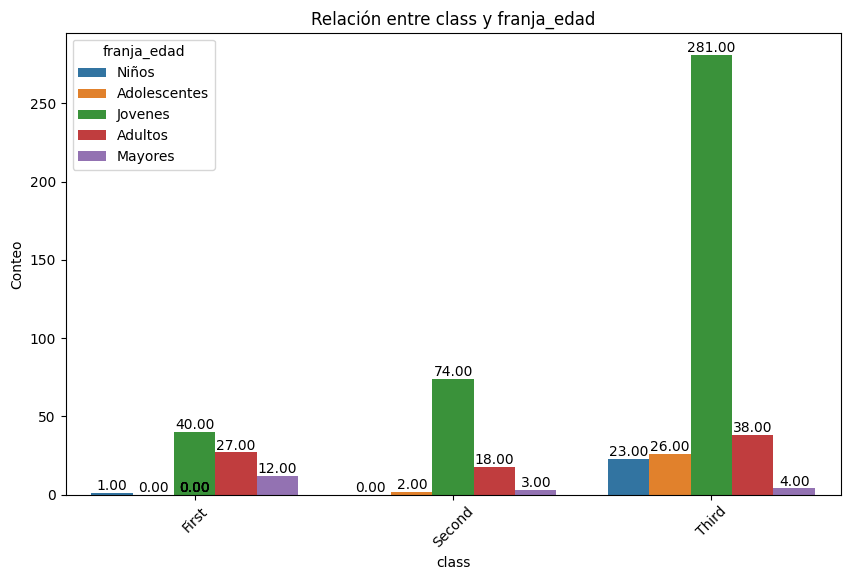

Respuesta yes:


c:\Users\marce\Documents\The_Bridge\ONLINE_DS_THEBRIDGE_marosor\Sprint7\S7 U2\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


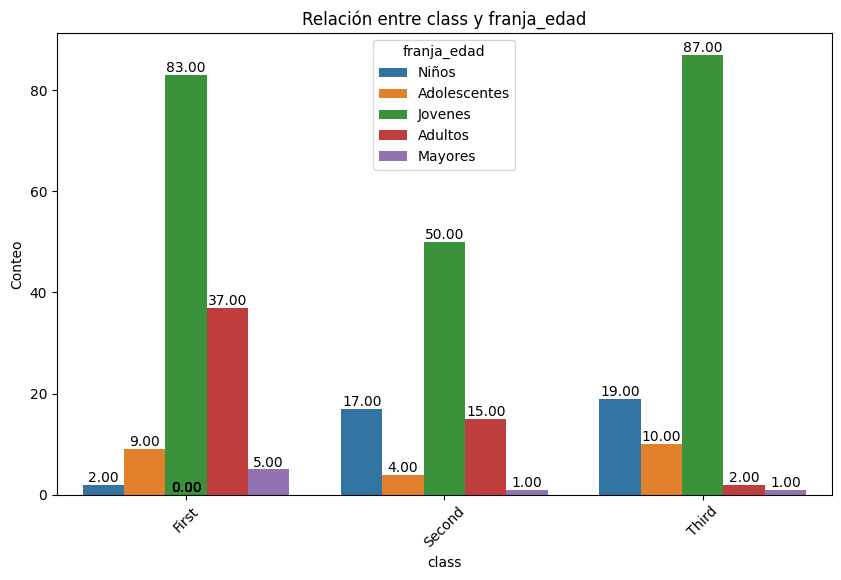

In [34]:
for valor, df_titanic in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_titanic, col_2, col_1, relative_freq = False, show_values = True)

Respuesta no:


c:\Users\marce\Documents\The_Bridge\ONLINE_DS_THEBRIDGE_marosor\Sprint7\S7 U2\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


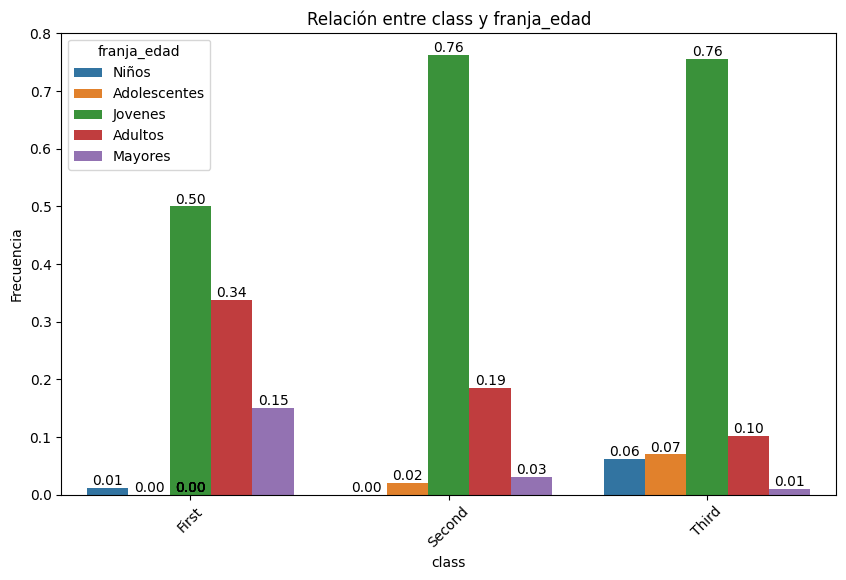

Respuesta yes:


c:\Users\marce\Documents\The_Bridge\ONLINE_DS_THEBRIDGE_marosor\Sprint7\S7 U2\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


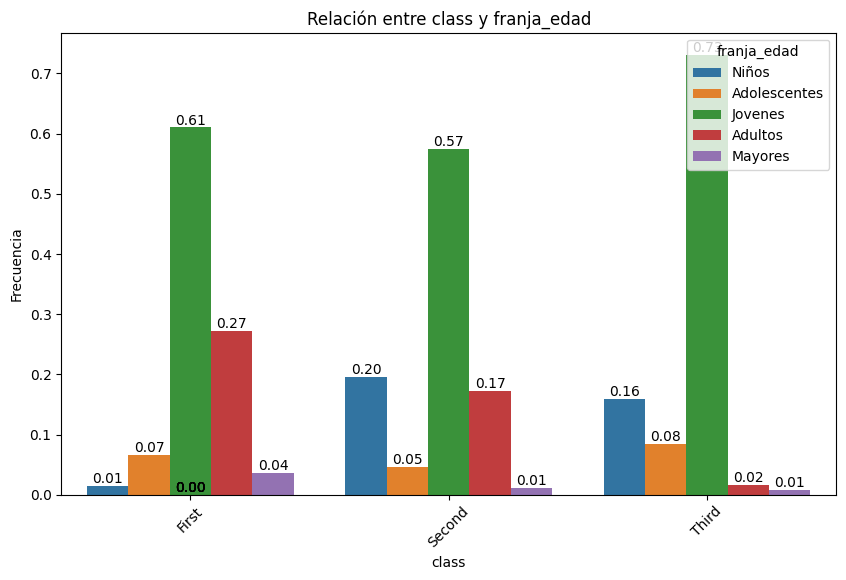

In [35]:
# Y lo mismo pero relativo
for valor, df_titanic in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_titanic, col_2, col_1, relative_freq = True, show_values = True)

# Los jóvenes de 30 años son los que más sobrevivieron, tanto en términos absolutos como relativosen todas las clases

In [36]:
# edad, coste del billete y fallecimiento
#col1 = "age"
#col2 = "fare"
#diccionario_multivariante = {}
#for valor in df_titanic[col_directora].unique():
#    diccionario_multivariante[valor] =df_titanic.loc[df_titanic[col_directora] == valor, [col2, col1]]

# Intento copiar el código de Jaime de dispersión pero me da error antes de llegar a la propia disèrsión- . Y error de "alive", aunque incluso haya
#  quitado esa referencia a col_dir acá y  llame a la misma de más arriba, pero el mensaje de error sigue haciendo referencia eso.

# Algo he modificado sin querer al hacer lo de la franja de edad, pero no consigo que me recupere nada del df excepto las columnas class y 
# franja_edad, pero eso si hago el df_titani.info(). Pasa que la fui hacindo hacia arriba y tb me da solo esas doslíneas incluso antes de otros 
# bloques de código que sí que imprimen una tabla dinde sale la variable alive. Es decir, no me doy cuenta cuándome he cargadoalive, si es que me 
# lo he carado, porque si me lo he cargado para las tablas sí me las muestra.... no  entiendo!!!

# Mi plan era tener un scatter plot de muertos y otro de vivos. Ñe

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

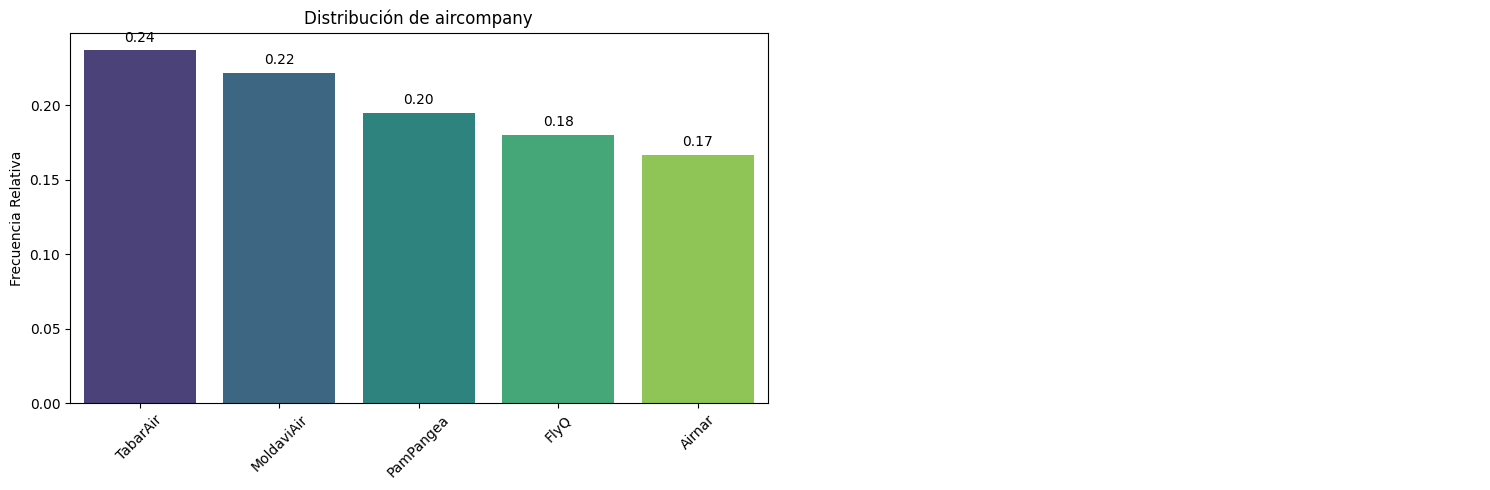

In [37]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa = True, mostrar_valores = True)

(2,)


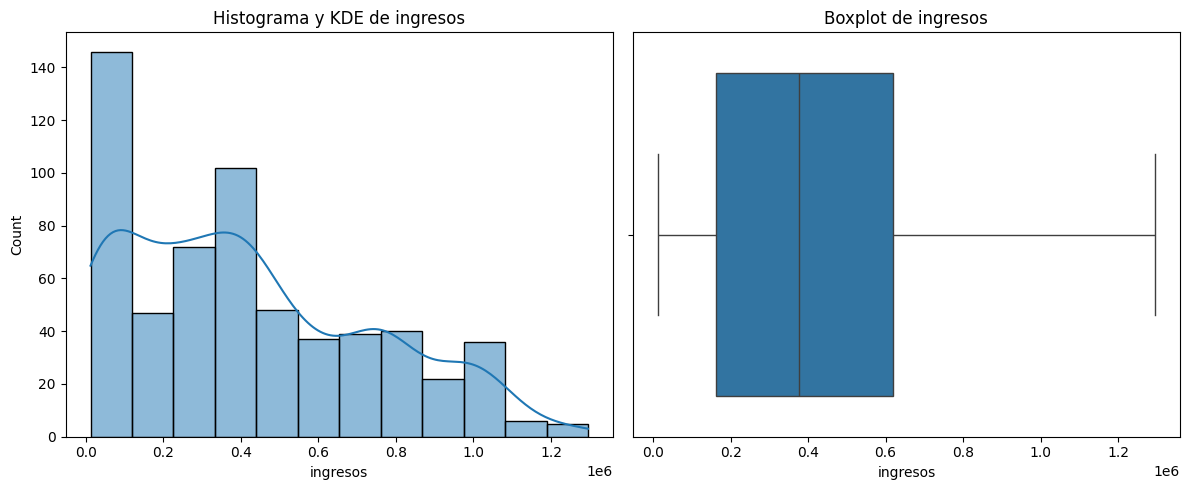

In [38]:
plot_combined_graphs(df_air_jun, ["ingresos"])

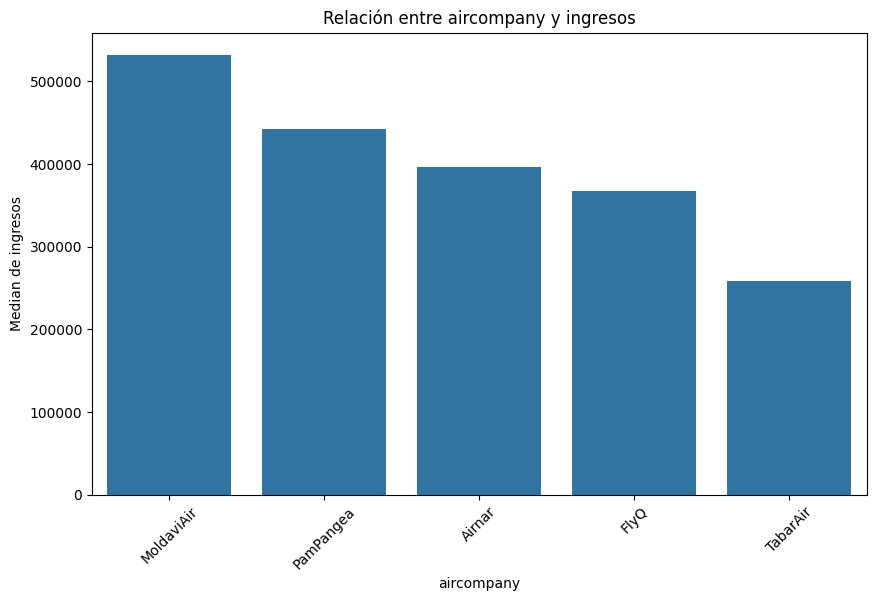

In [39]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany", "ingresos", measure = "median")
# Como primera conclusión, preocupante, la empresa es la que tiene más vuelos y menos ingresos. O tiene poco margen, o gasta mucho, o factura 
# poco, pero si duda hay que mejorar la relación entre ingresos y número de vuelos, a menos que haya algún motivo que lo sostenga 

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


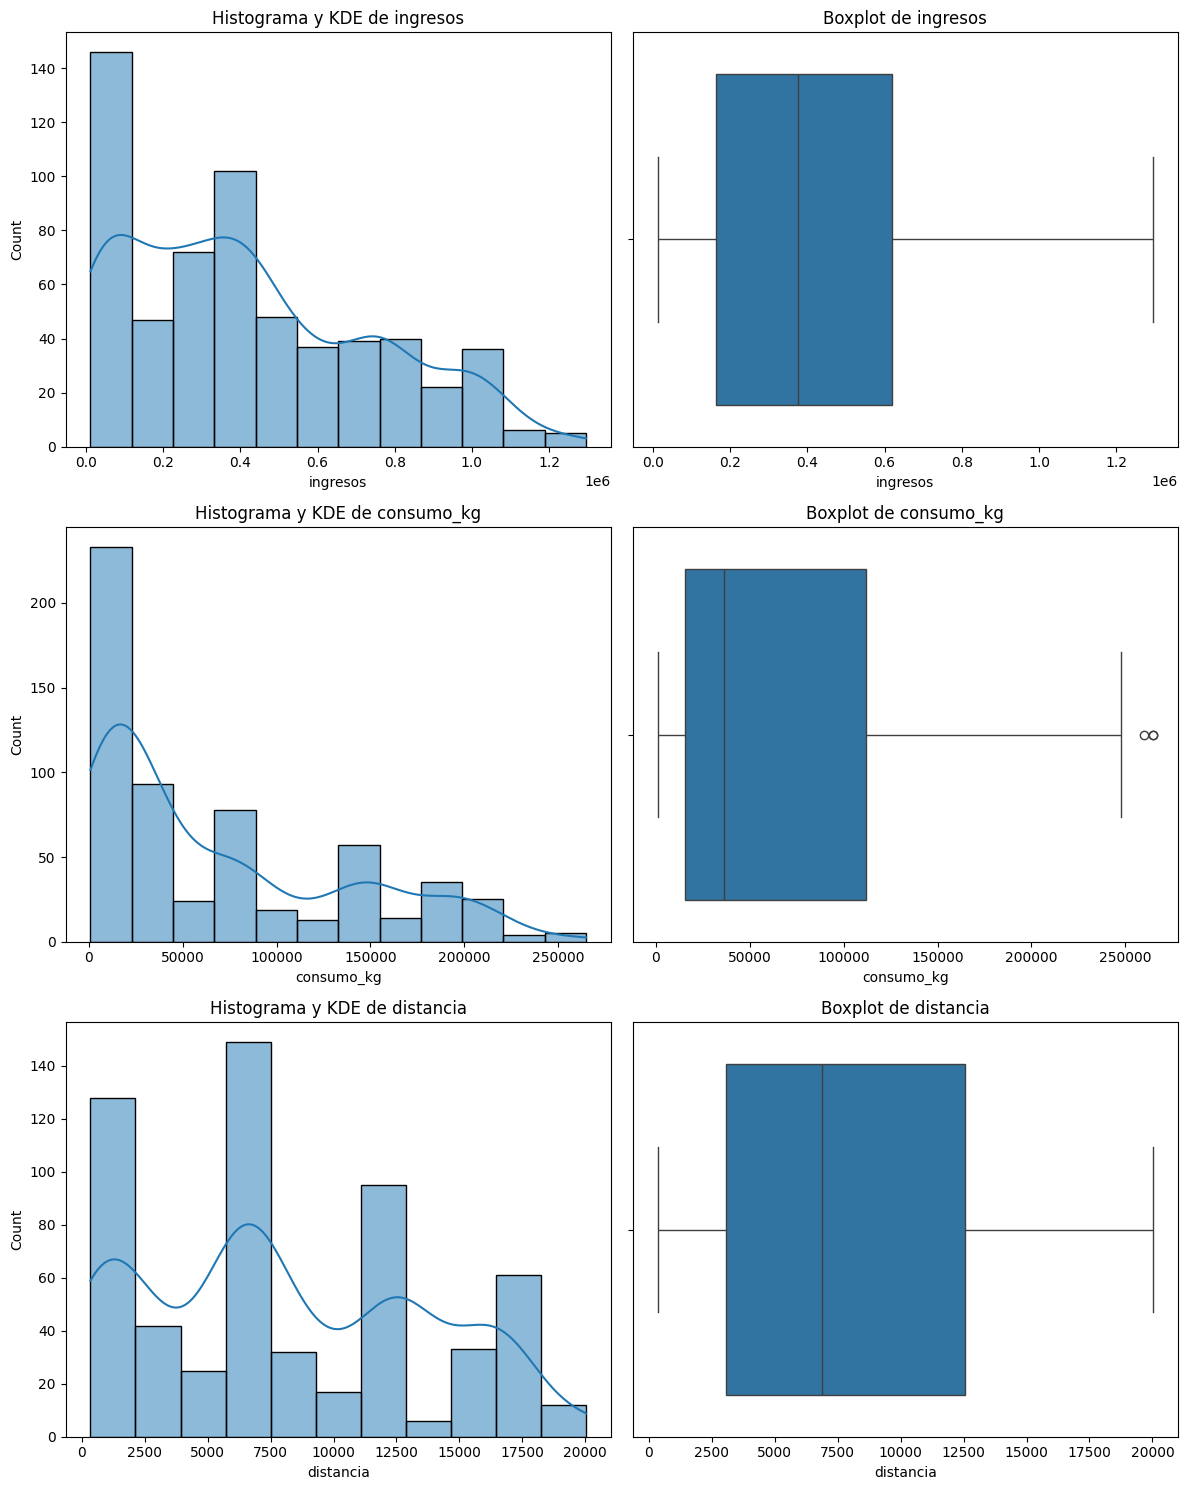

In [40]:
plot_combined_graphs(df_air_jun,["ingresos", "consumo_kg", "distancia"])

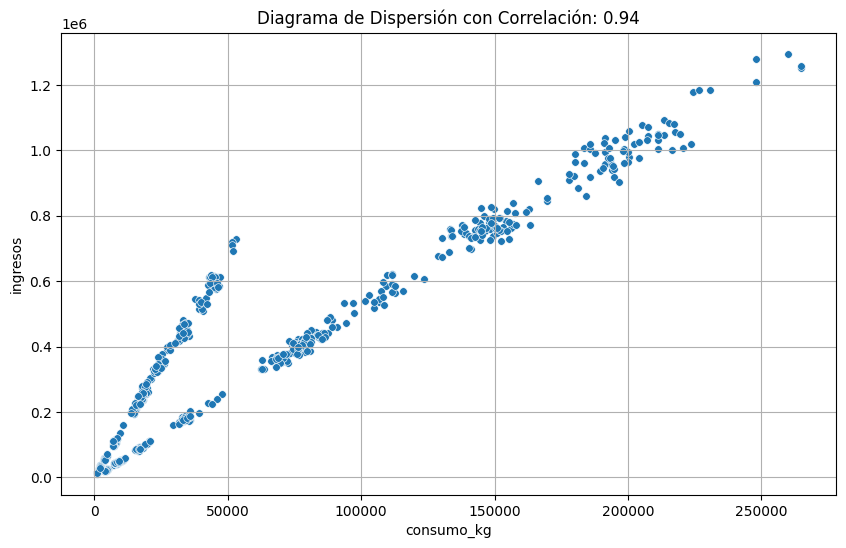

In [41]:
grafico_dispersion_con_correlacion(df_air_jun, "consumo_kg","ingresos", mostrar_correlacion = True, tamano_puntos = 30)

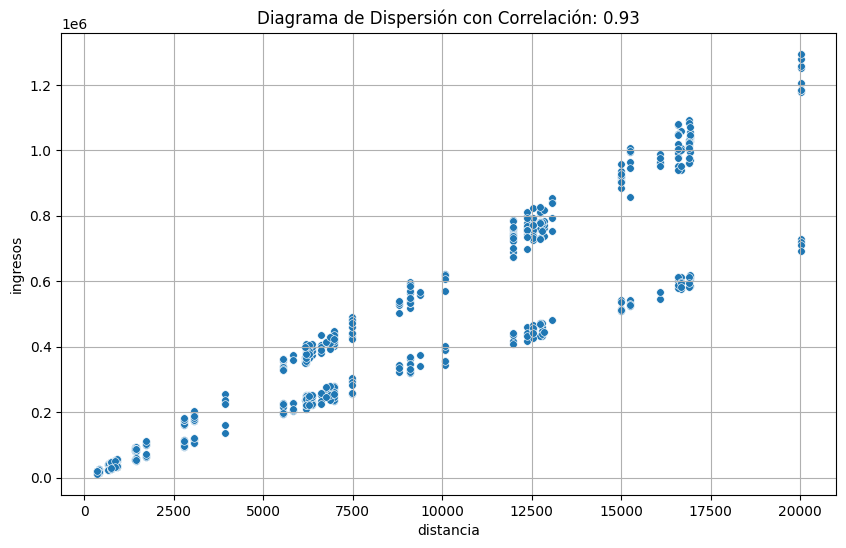

In [42]:
grafico_dispersion_con_correlacion(df_air_jun, "distancia","ingresos", mostrar_correlacion = True, tamano_puntos = 30)

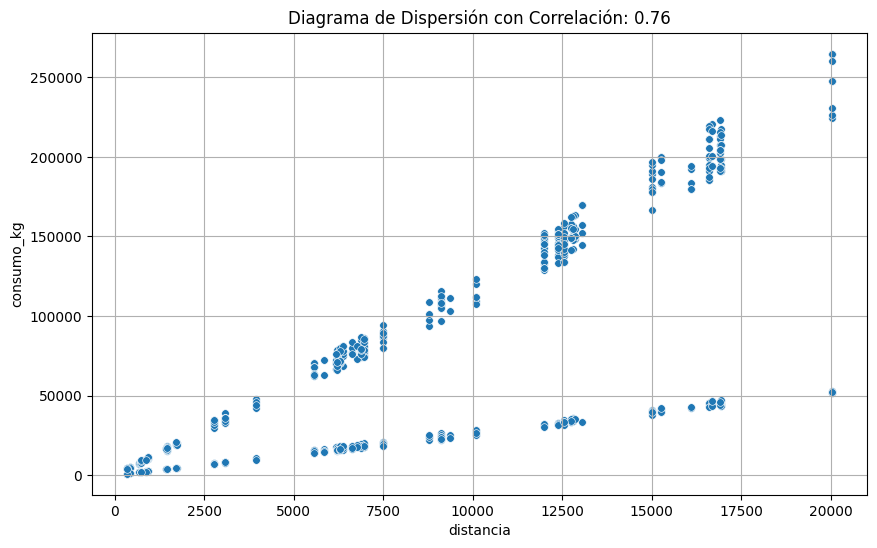

In [43]:
grafico_dispersion_con_correlacion(df_air_jun, "distancia", "consumo_kg", mostrar_correlacion = True, tamano_puntos = 30)

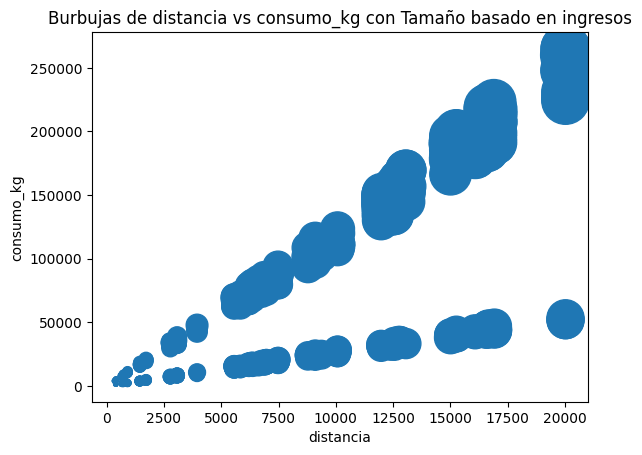

In [44]:
bubble_plot(df_air_jun, "distancia", "consumo_kg", "ingresos")
# Estos últimos gráficos nos mostraban que hay una línea interesante de análisiscon esos vuelos que generan buenos ingresos pero consumen poco

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [45]:
df_air_jun["duracion"].describe()

count     600.000000
mean      635.873333
std       450.474786
min        42.000000
25%       224.000000
50%       542.000000
75%       876.000000
max      1721.000000
Name: duracion, dtype: float64

In [57]:
def cat_vuelo(row):
    distancia = row["distancia"]
    if distancia < 5000:
        categoria = "CD"
    elif 5000 <= distancia < 11000:
        categoria = "MD" 
    elif 11000 <= distancia < 17500:
        categoria = "LG" 
    else:
        categoria = "MLD" 
    
    return categoria

In [58]:
df_air_jun["cat_vuelo"] = df_air_jun.apply(cat_vuelo, axis = 1)


In [59]:
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,CD
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,LG
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,MD
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,MD
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,MD
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,LG
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,CD
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,MD
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,LG


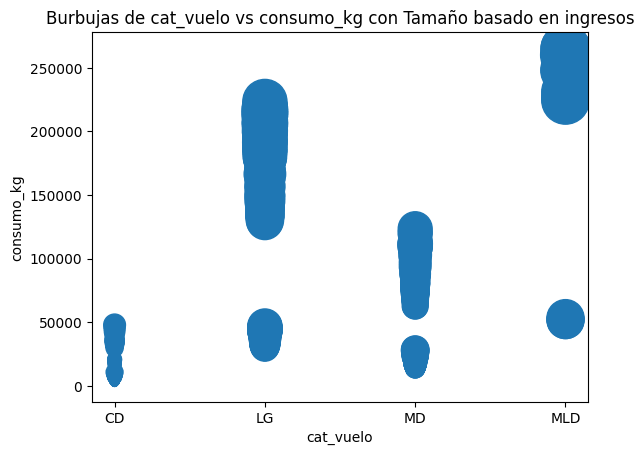

In [60]:
# Y volvemos a hacer el análisis de antes:
bubble_plot(df_air_jun, "cat_vuelo", "consumo_kg", "ingresos")

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.